### Twitter Sentiment Analysis 

<br>

This project was development for Sentiment classification of tweets, we will use Deep learning for we help in this project, is very important recognizing which is spoken in twitter and the sentiment put on the text, however it is a problem kind of NLP


<br>



<p align=center>
<img src="https://s2.glbimg.com/MFUjAUG_nOFLIcRvRJvfAmyRwmE=/56x54:1500x792/695x355/s.glbimg.com/po/tt2/f/original/2016/01/19/capa-twitter-1.png" width="70%"></p>


<br>
<hr>


In [1]:
!wget https://icedrive.net/0/0cUDEt5Wb3

--2020-09-11 14:37:19--  https://icedrive.net/0/0cUDEt5Wb3
Resolving icedrive.net (icedrive.net)... 172.67.145.45, 104.18.41.104, 104.18.40.104, ...
Connecting to icedrive.net (icedrive.net)|172.67.145.45|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-09-11 14:37:20 ERROR 404: Not Found.



In [2]:
!pip install -q pyyaml h5py
!pip install emoji

In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-09-11 14:37:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-11 14:37:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-11 14:37:26--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [4]:
import re
import string
import random 
import time 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import emoji 
from PIL import  Image

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.layers import LSTM, Dropout, GRU, Bidirectional

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# set global seed 
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
# GPU with TensorFlow 

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
path = '/content/drive/My Drive/Deep Learning - Projetos/Classificação de Texto - Twitter /training.1600000.processed.noemoticon.csv'
data = pd.read_csv(path, encoding='latin', header=None)

In [8]:
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
data.drop(['id', 'date', 'query', 'user_id'], axis=1, inplace=True)

In [10]:
data['sentiment'] = data['sentiment'].astype(str)
data['text'] = data['text'].astype(str)

In [11]:
# Cleaning text 

def cleaning_text(text):

  """
  Cleaning text in Twetts 
  Removing unwanted characters and emojis
                 
                                          """
  
  # Removing characters and emojis 
  removing_list = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

  text = emoji_pattern.sub(r'', str(text))
  text = re.sub(removing_list, " ", text)
  text = re.sub(r'\W+', ' ', text)
  text = re.sub("'", '', text)
  text = text.lower().strip()


  # Stemming and Stopwords 
  stemmer = SnowballStemmer('english')
  stop_words = set(stopwords.words('english'))

  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(stemmer.stem(token))
    else: 
      pass 


  return " ".join(tokens)

In [12]:
# mapping tweets sentiments 
dicio = {'0':'Negative', '4':'Positive'}
data['sentiment'] = data['sentiment'].map(dicio)

In [13]:
#classes of tweets 
negatives = data[data.sentiment == 'Negative']['text']
positives = data[data.sentiment == 'Positive']['text']

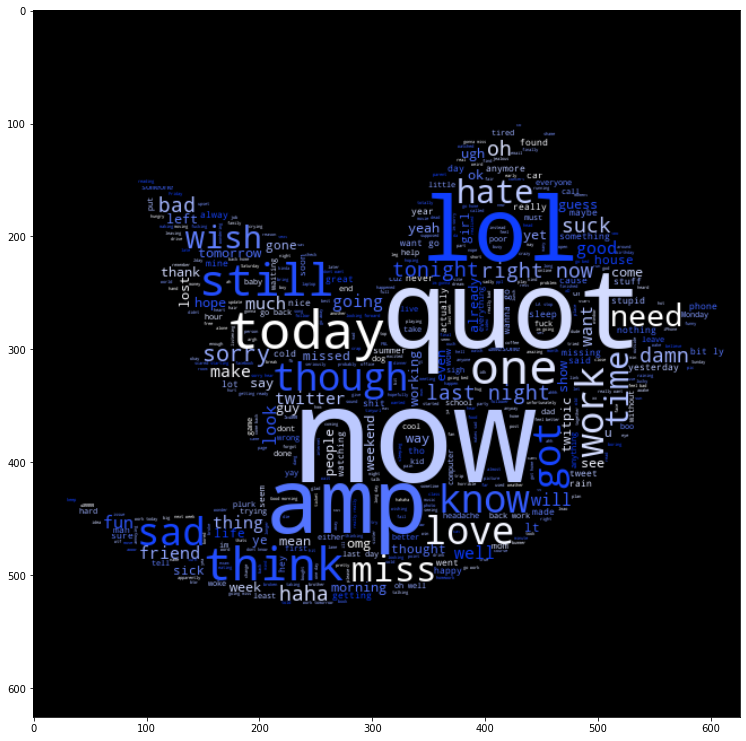

In [14]:
# Negative word cloud 

def color_map(word, font_size, position, orientation, random_state=None, **kwargs):
  return "hsl(230, 140%%, %d%%)" % random.randint(60,100)

mask = np.array(Image.open("/content/drive/My Drive/Deep Learning - Projetos/Classificação de Texto - Twitter /twitter_01.png"))


plt.figure(figsize=(15,13))
negative_cloud = WordCloud(mask=mask, color_func=color_map, max_words=10000, width=1600, height=800)
negative_cloud.generate(" ".join(negatives))

plt.imshow(negative_cloud ,interpolation='bilinear')

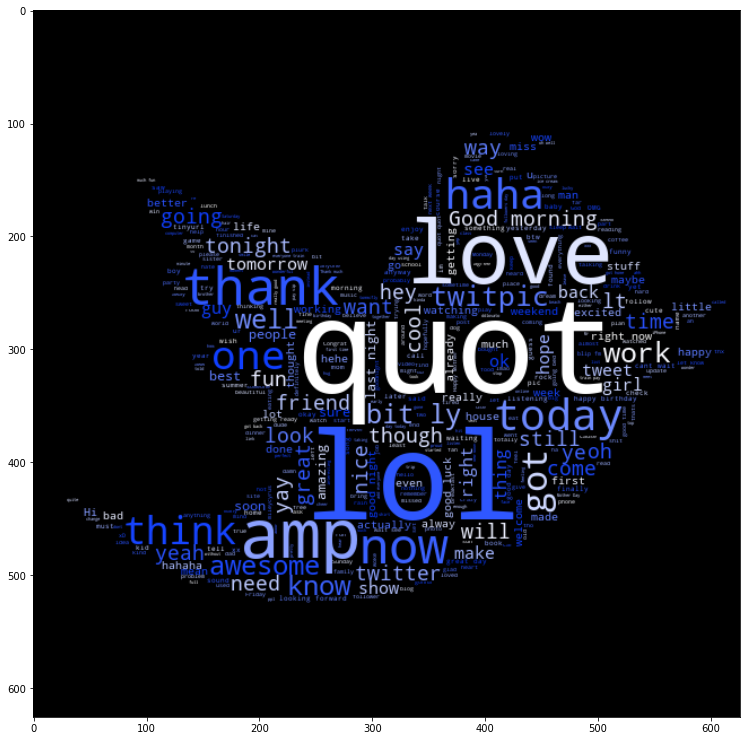

In [15]:
# Positive Word Cloud 

plt.figure(figsize=(15,13))
positive_cloud = WordCloud(mask=mask, color_func=color_map, max_words=10000, width=1600, height=800)
positive_cloud.generate(" ".join(positives))


plt.imshow(positive_cloud ,interpolation='bilinear')

In [16]:
def feature_engineering(data):

  """ Pipeline of Feature engineering for 
       text classification problem 
      
      1 - cleaning text 
      2 - spliting data
      3 - label encoder 
      4 - tokenization 
      5 - pad_sequences 
                                        """

  # cleaning text 
  data['text'] = data['text'].apply(lambda x: cleaning_text(x))

  # spliting data 
  X = data['text']
  y = data['sentiment']

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

  # LabelEncoder 
  encoder = LabelEncoder()
  y_train = encoder.fit_transform(y_train.to_list())
  y_test = encoder.fit_transform(y_test.to_list())

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)
  

  print('Classes: ', encoder.inverse_transform([0,1]))
  print('\n')


  # Tokenization 
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)


  # Vocabulary Size 
  word_index = tokenizer.word_index
  num_words = len(word_index) + 1 

  # Tokens 
  sequence_train = tokenizer.texts_to_sequences(X_train)
  sequence_test = tokenizer.texts_to_sequences(X_test)

  # max sequence 
  MAX_SEQUENCE_LENGTH = 55
   
  # pad_sequences 
  X_train = pad_sequences(sequences=sequence_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
  X_test = pad_sequences(sequences=sequence_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')


  return (X_train, X_test, y_train, y_test, num_words, word_index, tokenizer)

In [17]:
X_train, X_test, y_train, y_test, num_words, word_index, tokenizer = feature_engineering(data)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Classes:  ['Negative' 'Positive']


(1120000, 55) (1120000, 1)
(480000, 55) (480000, 1)


In [18]:
# compile parameters

optimizer = RMSprop(learning_rate=0.001)
loss = BinaryCrossentropy()
metrics = ['accuracy']

In [19]:
# Embedding parameters

EMBEDDING_GLOVE = 300
WORD_INDEX = word_index
EMBEDDING_DIM = 200
MAX_SEQUENCE_LENGTH = 55
NUM_WORDS = 227664

In [20]:
# Build LSTM 


def lstm_architecture(pre_trained=True, num_words=NUM_WORDS, embedding_dim=EMBEDDING_GLOVE, max_sequence_length=MAX_SEQUENCE_LENGTH):

  """The LSTM model architecture
  with option for use Glove embedding """


  if pre_trained:

    # Glove Embedding 
    GLOVE_EMB = '/content/glove.6B.300d.txt'


    embeddings_index = {}
    f = open(GLOVE_EMB)
    for line in f:
      values = line.split()
      word = value = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
    f.close()

    print('Found {} word vectors.'.format(len(embeddings_index)))


    # Embedding matrix
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

    # LSTM with Glove 
    model = Sequential()
    model.add(Input(shape=max_sequence_length))
    model.add(Embedding(input_dim=num_words,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_sequence_length,
                        trainable=False))
    model.add(SpatialDropout1D(0.20))
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(SpatialDropout1D(0.20))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))


    return model 

  else:

    # LSTM without Glove 
    model = Sequential()
    model.add(Input(shape=max_sequence_length))
    model.add(Embedding(input_dim=num_words,
                            output_dim=embedding_dim,
                            input_length=max_sequence_length)) 
    model.add(SpatialDropout1D(0.20))
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(SpatialDropout1D(0.20))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    return model 

In [21]:
model = lstm_architecture(pre_trained=False, embedding_dim=EMBEDDING_DIM)

In [22]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 55, 200)           45532800  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 55, 200)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 128)           128128    
_________________________________________________________________
lstm (LSTM)                  (None, 55, 128)           131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 55, 128)           131584    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 55, 128)           0         
_________________________________________________________________
dense (Dense)                (None, 55, 512)           6

In [24]:
# callbacks

checkpoint = ModelCheckpoint(filepath='model.h5',
                             monitos='val_loss',
                             verbose=1,
                             save_only_weights=True)


early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.00001,
                               patience=10)


reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=5,
                                         min_delta=0.0001)



callbacks = [checkpoint, early_stopping, reduce_learning_rate]

In [25]:
%%time 

model.fit(X_train, y_train,
          batch_size=1024,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[callbacks])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.7585
Epoch 00001: saving model to model.h5
1094/1094 [==============================] - 627s 573ms/step - loss: 0.4976 - accuracy: 0.7585 - val_loss: 0.4672 - val_accuracy: 0.7775
Epoch 2/10
1094/1094 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.7851
Epoch 00002: saving model to model.h5
1094/1094 [==============================] - 630s 576ms/step - loss: 0.4564 - accuracy: 0.7851 - val_loss: 0.4633 - val_accuracy: 0.7815
Epoch 3/10
1094/1094 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.7980
Epoch 00003: saving model to model.h5
1094/1094 [==============================] - 620s 567ms/step - loss: 0.4356 - accuracy: 0.7980 - val_loss: 0.4677 - val_accuracy: 0.7791
Epoch 4/10
1094/1094 [==============================] - ETA: 0s - loss: 0.4126 - accuracy: 0.8117
Epoch 00004: saving model to model.h5
1094/1094 [==============================] - 

<br>
<hr>
<br>


In [26]:
# save weights 

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

<hr>

In [27]:
# Loading model json 
new_model = model_from_json(model_json)

In [28]:
new_model.load_weights('model.h5')


new_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [29]:
class_names = ['Negative', 'Positive']

In [30]:
def inference(text):

  # time 
  time_pred = time.time()

  # preprocessing inference 
  text = [text]
  sequence_text = tokenizer.texts_to_sequences(text)
  X_text = pad_sequences(sequence_text, maxlen=MAX_SEQUENCE_LENGTH)

  # prediction 
  sentiment = new_model.predict(X_text)
  sentiment = np.argmax(sentiment, axis=1)

  if sentiment.any() >= 0.50: 
    print('Sentiment: Positive')
    print('Inference Time: {}'.format(time_pred))
  elif sentiment.any() < 0.50:
    print('Sentiment: Negative')
    print('Inference Time: {}'.format(time_pred))
  else:
    pass 

In [31]:
text = 'I am glad to know you!!!'
inference(text)

Sentiment: Positive
Inference Time: 1599842118.7984948
